In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [131]:
col=['user_id','item_id','rating','timestamp']

In [132]:
user_data=pd.read_csv("u.data",sep='\t',names=col)

In [133]:
user_data

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [134]:
movies=pd.read_csv("Movie_Id_Titles")

In [135]:
movies

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [136]:
movies=pd.merge(user_data,movies,on='item_id')

In [137]:
movies

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [138]:
movies.groupby('title')['rating'].mean().sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [139]:
user_rating=pd.DataFrame(movies.groupby('title')['rating'].mean().sort_values(ascending=False))

In [140]:
user_rating

,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0
...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0
King of New York (1990),1.0
Touki Bouki (Journey of the Hyena) (1973),1.0


In [141]:
movies.groupby('title')['rating'].count().sort_values(ascending=False)

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [142]:
user_rating['count']=pd.DataFrame(movies.groupby('title')['rating'].count().sort_values(ascending=False))

In [146]:
user_rating.sort_values(by='count',ascending=False)

,rating,count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
Land and Freedom (Tierra y libertad) (1995),3.000000,1
"Big One, The (1997)",3.000000,1
Cyclo (1995),3.000000,1


<AxesSubplot:ylabel='title'>

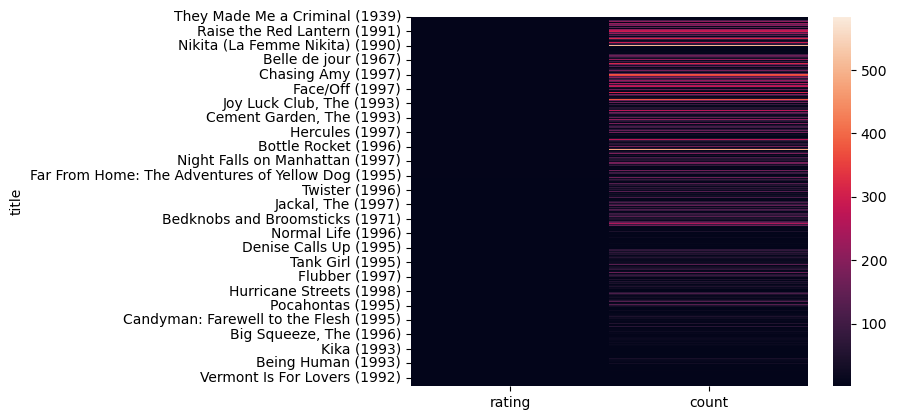

In [160]:
sns.heatmap(user_rating)

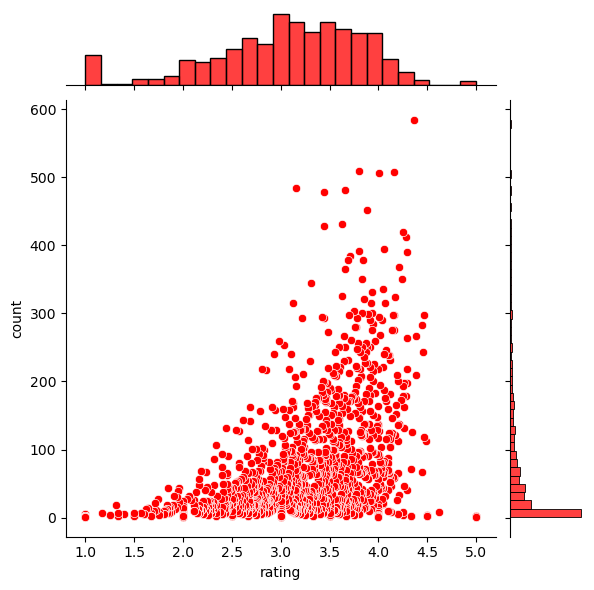

In [151]:
sns.jointplot(data=user_rating,y='count',x='rating',color='red')

In [193]:
movies_matrix=movies.pivot_table(index='user_id',columns='title',values='rating')

In [194]:
movies_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
user_rating.sort_values(by='count',ascending=False)

,rating,count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
Land and Freedom (Tierra y libertad) (1995),3.000000,1
"Big One, The (1997)",3.000000,1
Cyclo (1995),3.000000,1


In [196]:
starwar_rating=movies_matrix['Star Wars (1977)']
fargo_rating=movies_matrix['Fargo (1996)']

In [197]:
similar_to_starwar=movies_matrix.corrwith(starwar_rating)
similar_to_fargo=movies_matrix.corrwith(fargo_rating)

C:\Users\91886\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\91886\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\91886\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\91886\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [198]:
starwar_corr=pd.DataFrame(similar_to_starwar,columns=["corr"])

In [205]:
starwar_corr=pd.concat([starwar_corr,movies.groupby('title')['rating'].count().sort_values(ascending=False)],axis=1)

In [211]:
starwar_corr.dropna(inplace=True)

In [222]:
starwar_corr[starwar_corr['rating']>100].sort_values(by='corr',ascending=False)

,corr,rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [231]:
#'''THE MOVIES WHICH ARE SIMILAR TO STARWAR(1977) ARE:-
#1.Empire Strikes Back, The (1980)
#2.Return of the Jedi (1983)
#3.Raiders of the Lost Ark (1981)
#4.Austin Powers: International Man of Mystery (1997)

In [235]:
similar_to_fargo=movies_matrix.corrwith(fargo_rating)

C:\Users\91886\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\91886\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [245]:
fargo_corr=pd.DataFrame(similar_to_fargo,columns=['corr'])

In [246]:
fargo_corr.dropna(inplace=True)

In [248]:
fargo_corr=pd.concat([fargo_corr,movies.groupby('title')['rating'].count().sort_values(ascending=False)],axis=1)

In [251]:
fargo_corr[fargo_corr['rating']>100].sort_values(by='corr',ascending=False)

,corr,rating
title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173
...,...,...
Murder at 1600 (1997),-0.164567,218
Conan the Barbarian (1981),-0.174455,107
"Peacemaker, The (1997)",-0.192570,136


In [252]:
#'''THE MOVIES WHICH ARE SIMILAR Fargo (1996) TO  ARE:-
#1.Sling Blade (1996)
#2.Sling Blade (1996)
#3.Lone Star (1996)
#4.Lawrence of Arabia (1962)